# Analyze Simplified Uno

## Question: How many rounds does it take to finish the game?




In [8]:

import sys
sys.path.insert(0, "/home/paszin/Documents/board-game-simulation/src/GameSimulation/")

from Games.Uno import Game, Player
import numpy as np

import time

import random
random.seed(1419265)

import matplotlib.pyplot as plt


# How many rounds does it take with n cards per player?

In [9]:
start_time = time.time()


number_of_players = 3
cards_per_player = 6
number_of_iterations = 5000


turns_per_cards = {}
for cards_per_player in range(3, 11, 2):
    turns_per_cards[cards_per_player] = []
    random.seed(1892)
    for i in range(number_of_iterations):
        if i % 1000 == 0: print(i)
        game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
        game.setup()
        game.simulate(quiet=True, turns=200)
        turns_per_cards[cards_per_player].append(game.turn)


end_time= time.time()

print(f"{len(list(range(3, 11, 2))) * number_of_iterations} Simulations took {(end_time-start_time)//60}min {(end_time-start_time)%60}s")

0
1000
2000
3000


EmptyStackError: no more cards

Cards per player: 3
Maximum:  200
Minimum: 7
Mean: 29.643176020408163




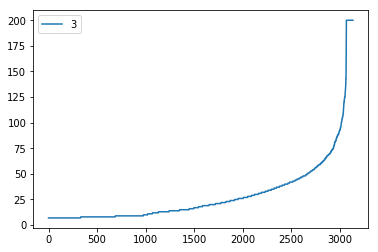

In [10]:
for cards_per_player, r in turns_per_cards.items():
    print("Cards per player:", cards_per_player)
    print("Maximum: ", max(r))
    print("Minimum:", min(r))
    print("Mean:", np.mean(r))
    print("\n")

#plt.plot(sorted(rounds))
#plt.show()

for cards_per_player, r in turns_per_cards.items():
    plt.plot(sorted(r), label=cards_per_player)
plt.legend()
plt.show()

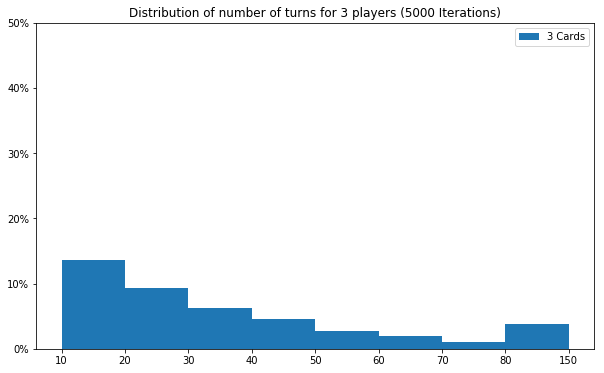

In [11]:

modified_turns_per_cards = {}
threshold = 80
for number_of_cards, turns in turns_per_cards.items():
    modified_turns_per_cards[number_of_cards] = list(map(lambda t: t if t < threshold else threshold + 1, turns))


borders = list(range(10, threshold + 11, 10))
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

plt.hist(np.transpose(list(modified_turns_per_cards.values())),
         bins=borders,
         label=list(map(lambda x: f"{x} Cards", modified_turns_per_cards.keys()))
         )
plt.xticks(borders, labels=[b if b <= threshold else "150" for b in borders])
plt.yticks(range(0, 2501, 500), labels=list(map(lambda y: f"{round(y / number_of_iterations * 100)}%", range(0, 2501, 500))))

plt.legend()
plt.title("Distribution of number of turns for 3 players (5000 Iterations)")

#plt.hlines([500], min(borders), max(borders), linestyles="dotted", linewidth=1)
plt.show()


# How many rounds does it take with n player?

In [ ]:
start_time = time.time()

number_of_players = 3
cards_per_player = 7
number_of_iterations = 5000
turns_with_number_of_players = {}
for number_of_players in range(2, 7):
    turns_with_number_of_players[number_of_players] = []
    random.seed(1892)
    for _ in range(number_of_iterations):
        game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
        game.setup()
        game.simulate(quiet=True)
        turns_with_number_of_players[number_of_players].append(game.turn)

end_time= time.time()

print(f"{5 * number_of_iterations} Simulations took {(end_time-start_time)//60}min {(end_time-start_time)%60}s")

In [ ]:

modified_turns_with_number_of_players = {}
threshold = 80
for number_of_players, turns in turns_with_number_of_players.items():
    modified_turns_with_number_of_players[number_of_players] = list(map(lambda t: t if t < threshold else threshold + 1, turns))


borders = list(range(10, threshold + 11, 10))
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

plt.hist(np.transpose(list(modified_turns_with_number_of_players.values())),
         bins=borders,
         label=list(map(lambda x: f"{x} Players", modified_turns_with_number_of_players.keys()))
         )
plt.xticks(borders, labels=[b if b <= threshold else "150" for b in borders])
plt.yticks(range(0, 2501, 500), labels=list(map(lambda y: f"{round(y / number_of_iterations * 100)}%", range(0, 2501, 500))))

plt.legend()
plt.title("Distribution of number of turns with 7 cards (5000 Iterations)")
#plt.gca().yaxis.set_major_formatter(PercentFormatter(0))

#plt.hlines([500], min(borders), max(borders), linestyles="dotted", linewidth=1)
plt.show()

In [ ]:
# Normalize with number of players

borders = [0, 10, 20, 30, 40, 50]

normalized_turns_with_number_of_players = {}
for number_of_players, turns in turns_with_number_of_players.items():
    normalized_turns_with_number_of_players[number_of_players] = list(map(lambda t: t/number_of_players, turns))


plt.hist(np.transpose(list(normalized_turns_with_number_of_players.values())), bins=borders, label=list(map(lambda x: f"{x} Players", normalized_turns_with_number_of_players.keys())))
plt.xticks(borders)
plt.yticks(range(0, 3501, 500), labels=list(map(lambda y: f"{round(y / number_of_iterations * 100)}%", range(0, 3501, 500))))
plt.legend()
plt.title("Distribution of number of rounds with 7 cards (5000 Iterations)")
plt.show()



In [ ]:
stds = []
for i in range(100, 8001, 100):
    stds.append(np.std(rounds[3][:i]))
    print(i, np.std(rounds[3][:i]))

In [ ]:
plt.plot(stds)
plt.plot()



# What a crazy game?

Analyze the longest game




In [ ]:
normalized_turns_with_number_of_players[2].index(max(normalized_turns_with_number_of_players[2]))

In [ ]:
number_of_rounds = max(normalized_turns_with_number_of_players[2])
print(f"Longest game with 2 players needs {number_of_rounds} rounds")

In [ ]:
# get the gamestate


number_of_players = 2
cards_per_player = 7
number_of_iterations = 5000

gamestates = []

random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    game.setup()
    game.simulate(quiet=True)
    gamestates.append(game.gamestate_history)


In [ ]:
longest_run = max(gamestates, key=len)

In [ ]:
len(longest_run)

In [ ]:
draw_pile_cards = []
stack_cards = []
for state in longest_run:
    draw_pile_cards.append(len(state.draw_pile))
    stack_cards.append(len(state.stack))

In [ ]:
plt.plot(stack_cards)